# Imports


In [ ]:
!pip install drawdata

In [25]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.model_selection import train_test_split
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import plotly.graph_objects as go
from sklearn.datasets import make_blobs
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from drawdata import ScatterWidget
from mlxtend.plotting import plot_decision_regions
ROOT_LOCAL = "D:\desk top folders\ML\MachineLearning2024W"
%cd {ROOT_LOCAL}

[Errno 2] No such file or directory: 'D:desk top foldersMLMachineLearning2024W'
/content


# Q1


## Section 2 - Generate Dataset


In [4]:
def plot_3d_dataset(points, labels, title):
    # Generated by ChatGPT
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    n = labels.max()+1
    colors = cm.rainbow(np.linspace(0, 1, n))
    for i in range(n):
        ax.scatter(points[labels == i, 0], points[labels == i, 1],
                   points[labels == i, 2], c=[colors[i]], label=f'Class {i}')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()
    plt.show()

In [5]:
widget = ScatterWidget()
widget

ScatterWidget()

In [7]:
data = widget.data_as_pandas
label_mapping = {'a': 0, 'b': 1, 'c': 2, 'd': 3}
data['label'] = data['label'].replace(label_mapping)
data

,x,y,color,label
0,85.392723,418.736377,#1f77b4,0
1,55.008618,447.761694,#1f77b4,0
2,86.769239,414.836531,#1f77b4,0
3,45.716102,414.412309,#1f77b4,0
4,65.665047,379.297015,#1f77b4,0
...,...,...,...,...
1471,557.929979,199.130845,#ff7f0e,1
1472,552.697936,191.331410,#ff7f0e,1
1473,572.046368,183.333536,#ff7f0e,1
1474,573.282276,190.982019,#ff7f0e,1


## Section 3 - Train Linear Model


In [8]:
X = data[["x",'y']].to_numpy()
Y = data[['label']].to_numpy().reshape(-1)
print(X.shape,Y.shape)
X_train_raw, X_test_raw, Y_train, Y_test = train_test_split(X,Y,train_size=0.8,random_state=53)

(1476, 2) (1476,)


In [9]:
scaler = preprocessing.StandardScaler().fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
s = preprocessing.StandardScaler().fit(X_train)
print(f"train mean is equal to {s.mean_} and variance is equal to {s.var_}")
s = preprocessing.StandardScaler().fit(X_test)
print(f"test mean is equal to {s.mean_} and variance is equal to {s.var_}")
print("shape of X_train, Y_train, X_test, Y_test is equal to:",
      X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

train mean is equal to [-2.29355141e-15 -3.21155532e-15] and variance is equal to [1. 1.]
test mean is equal to [ 0.01129894 -0.06388176] and variance is equal to [0.96605566 1.02824241]
shape of X_train, Y_train, X_test, Y_test is equal to: (1180, 2) (1180,) (296, 2) (296,)


### Logistic Regression


In [10]:
"""
Train Logistic Regression models with different solvers and configurations.

This block trains two sets of Logistic Regression models using different solvers and multi-class strategies:
- First set: Uses solvers 'sag', 'saga', 'lbfgs', 'newton-cg' with 'multinomial' multi-class strategy.
- Second set: Expands the solver list to include 'liblinear', 'newton-cholesky' and uses 'ovr' (one-vs-rest) strategy.

Parameters:
- X_train_raw, Y_train: Training dataset features and labels before normalization.
- X_test_raw, Y_test: Test dataset features and labels before normalization.
"""

print("These results are for training the LogisticRegression model before apply the normalization transform on the training and test set.")
# Training Logistic Regression models with 'multinomial' multi-class setting
LR0_Q1 = {}
for solver in ['sag', 'saga', 'lbfgs', 'newton-cg']:
	 # Training each model using the specified solver
    LR0_Q1[solver] = LogisticRegression(penalty="l2",
                                        dual=False,
                                        C=1.0,
                                        solver=solver,
                                        max_iter=1500,
                                        multi_class="multinomial",
                                        random_state=53).fit(X_train_raw, Y_train)

# Display the training and test scores for the model
for model in LR0_Q1.keys():
    print(f"model with {model} solver and multi_class=multinomial score on train set is equal ot {LR0_Q1[model].score(X_train_raw,Y_train)}")
    print(f"model with {model} solver and multi_class=multinomial score on test set is equal ot {LR0_Q1[model].score(X_test_raw,Y_test)}")
    y_pred = LR0_Q1[model].predict(X_test_raw)
    precision = precision_score(Y_test, y_pred,average='macro')
    recall = recall_score(Y_test, y_pred,average='macro')
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")

print("\n", "------------------------------------------------------------", "\n")

# Training Logistic Regression models with 'ovr' multi-class setting
LR0_Q1 = {}
for solver in ['sag', 'saga', 'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']:
    # Training each model using the specified solver for 'ovr' strategy
    LR0_Q1[solver] = LogisticRegression(penalty="l2",
                                        dual=False,
                                        C=1.0,
                                        solver=solver,
                                        max_iter=1500,
                                        multi_class='ovr',
                                        random_state=53).fit(X_train_raw, Y_train)

# Display the training and test scores for the model
for model in LR0_Q1.keys():
    print(f"model with {model} solver and multi_class=ovr score on train set is equal ot {LR0_Q1[model].score(X_train_raw,Y_train)}")
    print(f"model with {model} solver and multi_class=ovr score on test set is equal ot {LR0_Q1[model].score(X_test_raw,Y_test)}")
    y_pred = LR0_Q1[model].predict(X_test_raw)
    precision = precision_score(Y_test, y_pred,average='macro')
    recall = recall_score(Y_test, y_pred,average='macro')
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")



These results are for training the LogisticRegression model before apply the normalization transform on the training and test set.
model with sag solver and multi_class=multinomial score on train set is equal ot 0.5440677966101695
model with sag solver and multi_class=multinomial score on test set is equal ot 0.5675675675675675
test set: accuracy = 0.5675675675675675, recall = 0.4689517233821031, precision = 0.416779928723059

model with saga solver and multi_class=multinomial score on train set is equal ot 0.5432203389830509
model with saga solver and multi_class=multinomial score on test set is equal ot 0.5675675675675675
test set: accuracy = 0.5675675675675675, recall = 0.4689517233821031, precision = 0.41862960137325955

model with lbfgs solver and multi_class=multinomial score on train set is equal ot 0.8491525423728814
model with lbfgs solver and multi_class=multinomial score on test set is equal ot 0.8581081081081081
test set: accuracy = 0.8581081081081081, recall = 0.8493506493

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


model with sag solver and multi_class=ovr score on train set is equal ot 0.5627118644067797
model with sag solver and multi_class=ovr score on test set is equal ot 0.5709459459459459
test set: accuracy = 0.5709459459459459, recall = 0.46865307688092495, precision = 0.39033817539892235

model with saga solver and multi_class=ovr score on train set is equal ot 0.47627118644067795
model with saga solver and multi_class=ovr score on test set is equal ot 0.5067567567567568
test set: accuracy = 0.5067567567567568, recall = 0.40894295577839884, precision = 0.29273897058823534

model with lbfgs solver and multi_class=ovr score on train set is equal ot 0.8161016949152542
model with lbfgs solver and multi_class=ovr score on test set is equal ot 0.8344594594594594
test set: accuracy = 0.8344594594594594, recall = 0.8071428571428572, precision = 0.8464960058097313

model with liblinear solver and multi_class=ovr score on train set is equal ot 0.7703389830508475
model with liblinear solver and mult

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
"""
this block of code is for training LogisticRegression model with different solvers and different multi_class arguments

Parameters:
- X_train: Training dataset features after normalization
- X_test Test dataset features after normalization
"""

print("These results are obtained from training LogisticRegression model with different solvers and different multi_class arguments\n")
# Training Logistic Regression models with 'multinomial' multi-class setting
LR1_Q1 = {}
for solver in ['sag', 'saga', 'lbfgs', 'newton-cg']:
	# Training each model using the specified solver
    LR1_Q1[solver] = LogisticRegression(penalty="l2",
                                        dual=False,
                                        C=1.0,
                                        solver=solver,
                                        max_iter=1500,
                                        multi_class="multinomial",
                                        random_state=53).fit(X_train, Y_train)
# Display the training and test scores for the model
for model in LR1_Q1.keys():
    print(f"model with {model} solver and multi_class=multinomial score on train set is equal to {LR1_Q1[model].score(X_train,Y_train)}")
    print(f"model with {model} solver and multi_class=multinomial score on test set is equal to {LR1_Q1[model].score(X_test,Y_test)}")
    y_pred = LR1_Q1[model].predict(X_test)
    precision = precision_score(Y_test, y_pred,average='macro')
    recall = recall_score(Y_test, y_pred,average='macro')
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")

print("------------------------------------------------------------", "\n")

# Training Logistic Regression models with 'ovr' multi-class setting
LR2_Q1 = {}
for solver in ['sag', 'saga', 'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']:
	# Training each model using the specified solver
    LR2_Q1[solver] = LogisticRegression(penalty="l2",
                                        dual=False,
                                        C=1.0,
                                        solver=solver,
                                        max_iter=1500,
                                        multi_class='ovr',
                                        random_state=53).fit(X_train, Y_train)
# Display the training and test scores for the model
for model in LR2_Q1.keys():
    print(f"model with {model} solver and multi_class=ovr score on train set is equal to {LR2_Q1[model].score(X_train,Y_train)}")
    print(f"model with {model} solver and multi_class=ovr score on test set is equal to {LR2_Q1[model].score(X_test,Y_test)}")
    y_pred = LR2_Q1[model].predict(X_test)
    precision = precision_score(Y_test, y_pred,average='macro')
    recall = recall_score(Y_test, y_pred,average='macro')
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")

These results are obtained from training LogisticRegression model with different solvers and different multi_class arguments

model with sag solver and multi_class=multinomial score on train set is equal to 0.8432203389830508
model with sag solver and multi_class=multinomial score on test set is equal to 0.8547297297297297
test set: accuracy = 0.8547297297297297, recall = 0.8422077922077922, precision = 0.8599756579362824

model with saga solver and multi_class=multinomial score on train set is equal to 0.8432203389830508
model with saga solver and multi_class=multinomial score on test set is equal to 0.8547297297297297
test set: accuracy = 0.8547297297297297, recall = 0.8422077922077922, precision = 0.8599756579362824

model with lbfgs solver and multi_class=multinomial score on train set is equal to 0.8432203389830508
model with lbfgs solver and multi_class=multinomial score on test set is equal to 0.8547297297297297
test set: accuracy = 0.8547297297297297, recall = 0.842207792207792

In [28]:
"""
There results set the best value of C between 0.01 and 1.5

Parameters:
- X_train: Training dataset features after normalization
- X_test Test dataset features after normalization
"""

print("These results indicate the beset value of C between 0.01 and 1.5\n")

# Training Logistic Regression models with 'multinomial' multi-class setting and different C values
LR3_Q1 = {}
for solver in ['sag', 'saga', 'lbfgs', 'newton-cg']:

    best_score = -1
    for i in np.arange(0.01, 1.5, 0.01):
		# Training each model using the specified solver and C value
        m = LogisticRegression(penalty="l2",
                               dual=False,
                               C=i,
                               solver=solver,
                               max_iter=1500,
                               multi_class="multinomial",
                               random_state=53).fit(X_train, Y_train)

        if m.score(X_test, Y_test) > best_score:
            best_score = m.score(X_test, Y_test)
            LR3_Q1[solver] = m

# Display the training and test scores for the model
for model in LR3_Q1.keys():
    print(f"model with {model} solver and multi_class=multinomial score on train set is equal to {LR3_Q1[model].score(X_train,Y_train)}. C={LR3_Q1[model].get_params()['C']}")
    print(f"model with {model} solver and multi_class=multinomial score on test set is equal to {LR3_Q1[model].score(X_test,Y_test)}")
    y_pred = LR3_Q1[model].predict(X_test)
    precision = precision_score(Y_test, y_pred,average='macro')
    recall = recall_score(Y_test, y_pred,average='macro')
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")

print("\n")

# Training Logistic Regression models with 'ovr' multi-class setting and different C values
LR4_Q1 = {}
for solver in ['sag', 'saga', 'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']:
	# Training each model using the specified solver and C value
    best_score = -1
    for i in np.arange(0.01, 1.5, 0.01):
        m = LogisticRegression(penalty="l2",
                               dual=False,
                               C=i,
                               solver=solver,
                               max_iter=1500,
                               multi_class="ovr",
                               random_state=53).fit(X_train, Y_train)

        if m.score(X_test, Y_test) > best_score:
            best_score = m.score(X_test, Y_test)
            LR4_Q1[solver] = m

# Display the training and test scores for the model
for model in LR4_Q1.keys():
    print(f"model with {model} solver and multi_class=ovr score on train set is equal to {LR4_Q1[model].score(X_train,Y_train)}. C={LR4_Q1[model].get_params()['C']}")
    print(f"model with {model} solver and multi_class=ovr score on test set is equal to {LR4_Q1[model].score(X_test,Y_test)}")
    y_pred = LR4_Q1[model].predict(X_test)
    precision = precision_score(Y_test, y_pred,average='macro')
    recall = recall_score(Y_test, y_pred,average='macro')
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")

These results indicate the beset value of C between 0.01 and 1.5

model with sag solver and multi_class=multinomial score on train set is equal to 0.8432203389830508. C=0.81
model with sag solver and multi_class=multinomial score on test set is equal to 0.8547297297297297
test set: accuracy = 0.8547297297297297, recall = 0.8422077922077922, precision = 0.8599756579362824

model with saga solver and multi_class=multinomial score on train set is equal to 0.8432203389830508. C=0.81
model with saga solver and multi_class=multinomial score on test set is equal to 0.8547297297297297
test set: accuracy = 0.8547297297297297, recall = 0.8422077922077922, precision = 0.8599756579362824

model with lbfgs solver and multi_class=multinomial score on train set is equal to 0.8432203389830508. C=0.8
model with lbfgs solver and multi_class=multinomial score on test set is equal to 0.8547297297297297
test set: accuracy = 0.8547297297297297, recall = 0.8422077922077922, precision = 0.8599756579362824

mo

In [31]:
"""among different solvers and multi_class approaches the newton-cg solver with multinomial approach
and liblinear solver with ovr selected and the process will be continued

Parameters:
- X_train: Training dataset features after normalization
- X_test Test dataset features after normalization
"""

print("among different solvers and multi_class approaches the newton-cg solver with multinomial approach and liblinear solver with ovr selected and the process will be continued\n")

# Training Logistic Regression models with 'multinomial' multi-class setting
LR5_Q1 = None
best_score = -1
for i in np.linspace(1e-6, 1e-1, num=200):
    m = LogisticRegression(penalty="l2",
                           dual=False,
                           C=0.8,
                           solver="newton-cg",
                           max_iter=1500,
                           multi_class="multinomial",
                           tol=i,
                           random_state=53).fit(X_train, Y_train)

    if m.score(X_test, Y_test) > best_score:
        best_score = m.score(X_test, Y_test)
        LR5_Q1 = m

print(f"model with newton solver and multi_class=multinomial score on train set is equal to {LR5_Q1.score(X_train,Y_train)}. tol={LR5_Q1.get_params()['C']}")
print(f"model with newton solver and multi_class=multinomial score on test set is equal to {LR5_Q1.score(X_test,Y_test)}")
y_pred = LR5_Q1.predict(X_test)
precision = precision_score(Y_test, y_pred,average='macro')
recall = recall_score(Y_test, y_pred,average='macro')
accuracy = accuracy_score(Y_test, y_pred)
print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")

LR6_Q1 = None
best_score = -1
for i in np.linspace(1e-6, 1e-1, num=200):
    m = LogisticRegression(penalty="l2",
                           dual=False,
                           C=1.48,
                           solver="liblinear",
                           max_iter=1500,
                           multi_class="ovr",
                           tol=i,
                           random_state=53).fit(X_train, Y_train)

    if m.score(X_test, Y_test) > best_score:
        best_score = m.score(X_test, Y_test)
        LR6_Q1 = m

print(f"model with liblinear solver and multi_class=ovr score on train set is equal to {LR6_Q1.score(X_train,Y_train)}. tol={LR6_Q1.get_params()['tol']}")
print(f"model with liblinear solver and multi_class=ovr score on test set is equal to {LR6_Q1.score(X_test,Y_test)}")
y_pred = LR6_Q1.predict(X_test)
precision = precision_score(Y_test, y_pred,average='macro')
recall = recall_score(Y_test, y_pred,average='macro')
accuracy = accuracy_score(Y_test, y_pred)
print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")

among different solvers and multi_class approaches the newton-cg solver with multinomial approach and liblinear solver with ovr selected and the process will be continued

model with newton solver and multi_class=multinomial score on train set is equal to 0.8432203389830508. tol=0.8
model with newton solver and multi_class=multinomial score on test set is equal to 0.8547297297297297
test set: accuracy = 0.8547297297297297, recall = 0.8422077922077922, precision = 0.8599756579362824

model with liblinear solver and multi_class=ovr score on train set is equal to 0.7932203389830509. tol=1e-06
model with liblinear solver and multi_class=ovr score on test set is equal to 0.8175675675675675
test set: accuracy = 0.8175675675675675, recall = 0.7770343580470163, precision = 0.8533271015376278



In [32]:
"""
the dual parameter is only applicable for liblinear solver thus the solver is liblinear and dual is true.

Parameters:
- X_train: Training dataset features after normalization
- X_test Test dataset features after normalization
"""
print("The dual parameter is only applicable for liblinear solver thus the solver is liblinear and dual is true.")
LR7_Q1 = LogisticRegression(penalty="l2",
                            dual=True,
                            C=1.48,
                            solver="liblinear",
                            max_iter=1500,
                            multi_class="ovr",
                            tol=1e-6,
                            random_state=53).fit(X_train, Y_train)

print(f"model with liblinear solver and multi_class=ovr score on train set is equal to {LR7_Q1.score(X_train,Y_train)}.")
print(f"model with liblinear solver and multi_class=ovr score on test set is equal to {LR7_Q1.score(X_test,Y_test)}")
y_pred = LR7_Q1.predict(X_test)
precision = precision_score(Y_test, y_pred,average='macro')
recall = recall_score(Y_test, y_pred,average='macro')
accuracy = accuracy_score(Y_test, y_pred)
print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")

The dual parameter is only applicable for liblinear solver thus the solver is liblinear and dual is true.
model with liblinear solver and multi_class=ovr score on train set is equal to 0.7932203389830509.
model with liblinear solver and multi_class=ovr score on test set is equal to 0.8175675675675675
test set: accuracy = 0.8175675675675675, recall = 0.7770343580470163, precision = 0.8533271015376278



### SGDClassifier


In [16]:
"""
Train SGDClassifier models with different loss functions.

This block trains SGDClassifier models using various loss functions to demonstrate how they impact the model's performance.

Parameters:
- X_train, Y_train: Training dataset features and labels (assumed to be normalized).
- X_test, Y_test: Test dataset features and labels (assumed to be normalized).
"""

print("the SGDClassifier with different losses is calculated here\n")

# Training SGDClassifier with different loss functions
SGD1_Q1 = {}
for loss in ['hinge', 'log_loss', 'perceptron', 'squared_error']:

    SGD1_Q1[loss] = SGDClassifier(penalty="l2",
                                  loss=loss,
                                  alpha=0.0001,
                                  max_iter=4000,
                                  tol=1e-3,
                                  learning_rate='optimal',
                                  eta0=0,
                                  early_stopping=True,
                                  validation_fraction=0.1,
                                  n_iter_no_change=10,
                                  random_state=53).fit(X_train, Y_train)

# Display the training and test scores for the model
for loss in SGD1_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD1_Q1[loss].score(X_train,Y_train)} on the train set")
    print(f"model with {loss} loss function score is equal ot {SGD1_Q1[loss].score(X_test,Y_test)} on the test set")
    y_pred = SGD1_Q1[loss].predict(X_test)
    precision = precision_score(Y_test, y_pred,average='macro')
    recall = recall_score(Y_test, y_pred,average='macro')
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")

the SGDClassifier with different losses is calculated here

model with hinge loss function score is equal ot 0.7728813559322034 on the train set
model with hinge loss function score is equal ot 0.7871621621621622 on the test set
test set: accuracy = 0.7871621621621622, recall = 0.7569264069264069, precision = 0.8609801224743754

model with log_loss loss function score is equal ot 0.8144067796610169 on the train set
model with log_loss loss function score is equal ot 0.8547297297297297 on the test set
test set: accuracy = 0.8547297297297297, recall = 0.8361471861471862, precision = 0.8676587538623066

model with perceptron loss function score is equal ot 0.6025423728813559 on the train set
model with perceptron loss function score is equal ot 0.6385135135135135 on the test set
test set: accuracy = 0.6385135135135135, recall = 0.6587402049427366, precision = 0.541935050993022

model with squared_error loss function score is equal ot 0.1669491525423729 on the train set
model with squared_

In [17]:
"""
models with better performance selected and remains and the learning_rate is adaptive

Parameters:
- X_train, Y_train: Training dataset features and labels (assumed to be normalized).
- X_test, Y_test: Test dataset features and labels (assumed to be normalized).
"""

print("Models with better performance selected and remains and the learning_rate is adaptive\n")

SGD2_Q1 = {}
for loss in ['hinge', 'log_loss', 'perceptron']:
    SGD2_Q1[loss] = SGDClassifier(penalty="l2",
                                  loss=loss,
                                  alpha=0.0001,
                                  max_iter=4000,
                                  tol=1e-3,
                                  learning_rate='adaptive',
                                  eta0=0.0001,
                                  early_stopping=True,
                                  validation_fraction=0.1,
                                  n_iter_no_change=10,
                                  random_state=53).fit(X_train, Y_train)
for loss in SGD2_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD2_Q1[loss].score(X_train,Y_train)} on the train set")
    print(f"model with {loss} loss function score is equal ot {SGD2_Q1[loss].score(X_test,Y_test)} on the test set")
    y_pred = SGD2_Q1[loss].predict(X_test)
    precision = precision_score(Y_test, y_pred,average='macro')
    recall = recall_score(Y_test, y_pred,average='macro')
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")

Models with better performance selected and remains and the learning_rate is adaptive

model with hinge loss function score is equal ot 0.6440677966101694 on the train set
model with hinge loss function score is equal ot 0.668918918918919 on the test set
test set: accuracy = 0.668918918918919, recall = 0.5541509123787605, precision = 0.49074790624086395

model with log_loss loss function score is equal ot 0.6720338983050848 on the train set
model with log_loss loss function score is equal ot 0.7162162162162162 on the test set
test set: accuracy = 0.7162162162162162, recall = 0.6004712586991068, precision = 0.5471872179776129

model with perceptron loss function score is equal ot 0.8101694915254237 on the train set
model with perceptron loss function score is equal ot 0.7972972972972973 on the test set
test set: accuracy = 0.7972972972972973, recall = 0.7675324675324675, precision = 0.8101792551291496



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
"""
The best eta0 is selected between 1e13 and 20

Parameters:
- X_train, Y_train: Training dataset features and labels (assumed to be normalized).
- X_test, Y_test: Test dataset features and labels (assumed to be normalized).
"""

print("The best eta0 is selected between 1e13 and 20")

SGD3_Q1 = {}
for loss in ['hinge', 'log_loss', 'perceptron']:
    best_score = -1
    for i in np.linspace(1e-3, 50, 20):
        m = SGDClassifier(penalty="l2",
                          loss=loss,
                          alpha=0.0001,
                          max_iter=4000,
                          tol=1e-3,
                          learning_rate='adaptive',
                          eta0=i,
                          early_stopping=True,
                          validation_fraction=0.1,
                          n_iter_no_change=10,
                          random_state=53).fit(X_train, Y_train)

        if m.score(X_train, Y_train) > best_score:
            SGD3_Q1[loss] = m
            best_score = m.score(X_train, Y_train)

for loss in SGD3_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD3_Q1[loss].score(X_train,Y_train)} on the train set. eta0={SGD3_Q1[loss].get_params()['eta0']}")
    print(f"model with {loss} loss function score is equal ot {SGD3_Q1[loss].score(X_test,Y_test)} on the test set. eta0={SGD3_Q1[loss].get_params()['eta0']}")
    y_pred = SGD3_Q1[loss].predict(X_test)
    precision = precision_score(Y_test, y_pred,average='macro')
    recall = recall_score(Y_test, y_pred,average='macro')
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")

The best eta0 is selected between 1e13 and 20
model with hinge loss function score is equal ot 0.8152542372881356 on the train set. eta0=5.264052631578948
model with hinge loss function score is equal ot 0.8344594594594594 on the test set. eta0=5.264052631578948
test set: accuracy = 0.8344594594594594, recall = 0.8218614718614718, precision = 0.8486149149097423

model with log_loss loss function score is equal ot 0.811864406779661 on the train set. eta0=34.210842105263154
model with log_loss loss function score is equal ot 0.8277027027027027 on the test set. eta0=34.210842105263154
test set: accuracy = 0.8277027027027027, recall = 0.8023809523809524, precision = 0.8396593728514632

model with perceptron loss function score is equal ot 0.8313559322033899 on the train set. eta0=13.158631578947368
model with perceptron loss function score is equal ot 0.8445945945945946 on the test set. eta0=13.158631578947368
test set: accuracy = 0.8445945945945946, recall = 0.8389610389610389, precision 

In [33]:
"""
Better models selected and the best tol is selected between 1e-6 and 1e-2

Parameters:
- X_train, Y_train: Training dataset features and labels (assumed to be normalized).
- X_test, Y_test: Test dataset features and labels (assumed to be normalized).
"""

SGD4_Q1 = {}
best_score = -1
for i in np.linspace(1e-6,1e-2,20):
	m = SGDClassifier(penalty="l2",
				      loss='hinge',
				      alpha = 0.0001,
				      max_iter =4000,
                      tol = i,
                      learning_rate = 'adaptive',
                      eta0 = 5.26405,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change = 10,
				      random_state=53).fit(X_train,Y_train)
	if m.score(X_train,Y_train) > best_score:
	    SGD4_Q1["hinge"]=m
	    best_score = m.score(X_train,Y_train)

best_score = -1
for i in np.linspace(1e-6,1e-2,20):
    m = SGDClassifier(penalty="l2",
				      loss='log_loss',
				      alpha = 0.0001,
				      max_iter =4000,
                      tol = i,
                      learning_rate = 'adaptive',
                      eta0 = 34.21084,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change = 10,
				      random_state=53).fit(X_train,Y_train)
    if m.score(X_train,Y_train) > best_score:
        SGD4_Q1["log_loss"]=m
        best_score = m.score(X_train,Y_train)

for loss in SGD4_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD4_Q1[loss].score(X_train,Y_train)} on the train set. tol={SGD4_Q1[loss].get_params()['tol']}")
    print(f"model with {loss} loss function score is equal ot {SGD4_Q1[loss].score(X_test,Y_test)} on the test set. tol={SGD4_Q1[loss].get_params()['tol']}")
    y_pred = SGD4_Q1[loss].predict(X_test)
    precision = precision_score(Y_test, y_pred,average='macro')
    recall = recall_score(Y_test, y_pred,average='macro')
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")



model with hinge loss function score is equal ot 0.8152542372881356 on the train set. tol=1e-06
model with hinge loss function score is equal ot 0.8344594594594594 on the test set. tol=1e-06
test set: accuracy = 0.8344594594594594, recall = 0.8218614718614718, precision = 0.8486149149097423

model with log_loss loss function score is equal ot 0.8101694915254237 on the train set. tol=1e-06
model with log_loss loss function score is equal ot 0.8277027027027027 on the test set. tol=1e-06
test set: accuracy = 0.8277027027027027, recall = 0.8023809523809524, precision = 0.8396593728514632



In [36]:
"""
The best value for alpha obtained between 1e-6 and 1e-2

Parameters:
- X_train, Y_train: Training dataset features and labels (assumed to be normalized).
- X_test, Y_test: Test dataset features and labels (assumed to be normalized).
"""

print("The best value for alpha obtained between 1e-6 and 1e-2\n")
SGD5_Q1 = {}
best_score = -1
for i in np.linspace(1e-6, 10, 50):
    m = SGDClassifier(penalty="l2",
                      loss='hinge',
                      alpha=i,
                      max_iter=4000,
                      tol=1e-6,
                      learning_rate='adaptive',
                      eta0=5.26405,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change=10,
                      random_state=53).fit(X_train, Y_train)
    if m.score(X_train, Y_train) > best_score:
        SGD5_Q1["hinge"] = m
        best_score = m.score(X_train, Y_train)

best_score = -1
for i in np.linspace(1e-6, 1e-2, 20):
    m = SGDClassifier(penalty="l2",
                      loss='log_loss',
                      alpha=i,
                      max_iter=4000,
                      tol=1e-6,
                      learning_rate='adaptive',
                      eta0=34.21084,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change=10,
                      random_state=53).fit(X_train, Y_train)
    if m.score(X_train, Y_train) > best_score:
        SGD5_Q1["log_loss"] = m
        best_score = m.score(X_train, Y_train)

for loss in SGD5_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD5_Q1[loss].score(X_train,Y_train)} on the train set. alpha={SGD5_Q1[loss].get_params()['alpha']}")
    print(f"model with {loss} loss function score is equal ot {SGD5_Q1[loss].score(X_test,Y_test)} on the test set. aplha={SGD5_Q1[loss].get_params()['alpha']}")
    y_pred = SGD5_Q1[loss].predict(X_test)
    precision = precision_score(Y_test, y_pred,average='macro')
    recall = recall_score(Y_test, y_pred,average='macro')
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")

The best value for alpha obtained between 1e-6 and 1e-2

model with hinge loss function score is equal ot 0.809322033898305 on the train set. alpha=1e-06
model with hinge loss function score is equal ot 0.831081081081081 on the test set. aplha=1e-06
test set: accuracy = 0.831081081081081, recall = 0.8108225108225109, precision = 0.8446446292052674

model with log_loss loss function score is equal ot 0.8084745762711865 on the train set. alpha=1e-06
model with log_loss loss function score is equal ot 0.831081081081081 on the test set. aplha=1e-06
test set: accuracy = 0.831081081081081, recall = 0.8142857142857143, precision = 0.8377195000383406



In [39]:
"""
the best fraction of train val is selected

Parameters:
- X_train, Y_train: Training dataset features and labels (assumed to be normalized).
- X_test, Y_test: Test dataset features and labels (assumed to be normalized).
"""

print("The best fraction ov train val is selected")

SGD6_Q1 = {}
# ['hinge', 'log_loss']:
best_score = -1
for i in [0.1, 0.15, 0.2]:
    m = SGDClassifier(penalty="l2",
                      loss='hinge',
                      alpha=1e-6,
                      max_iter=4000,
                      tol=1e-6,
                      learning_rate='adaptive',
                      eta0=5.26405,
                      early_stopping=True,
                      validation_fraction=i,
                      n_iter_no_change=10,
                      random_state=53).fit(X_train, Y_train)
    if m.score(X_train, Y_train) > best_score:
        SGD6_Q1["hinge"] = m
        best_score = m.score(X_train, Y_train)

best_score = -1
for i in [0.1, 0.15, 0.2]:
    m = SGDClassifier(penalty="l2",
                      loss='log_loss',
                      alpha=1e-6,
                      max_iter=4000,
                      tol=1e-6,
                      learning_rate='adaptive',
                      eta0=34.21084,
                      early_stopping=True,
                      validation_fraction=i,
                      n_iter_no_change=10,
                      random_state=53).fit(X_train, Y_train)
    if m.score(X_train, Y_train) > best_score:
        SGD6_Q1["log_loss"] = m
        best_score = m.score(X_train, Y_train)

for loss in SGD6_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD6_Q1[loss].score(X_train,Y_train)} on the train set. eta0={SGD6_Q1[loss].get_params()['alpha']}. validation_fraction={SGD5_Q1[loss].get_params()['validation_fraction']}")
    print(f"model with {loss} loss function score is equal ot {SGD6_Q1[loss].score(X_test,Y_test)} on the test set. eta0={SGD6_Q1[loss].get_params()['alpha']}")
    y_pred = SGD6_Q1[loss].predict(X_test)
    precision = precision_score(Y_test, y_pred,average='macro')
    recall = recall_score(Y_test, y_pred,average='macro')
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")

The best fraction ov train val is selected
model with hinge loss function score is equal ot 0.8110169491525424 on the train set. eta0=1e-06. validation_fraction=0.1
model with hinge loss function score is equal ot 0.8243243243243243 on the test set. eta0=1e-06
test set: accuracy = 0.8243243243243243, recall = 0.8043290043290043, precision = 0.8403431680267839

model with log_loss loss function score is equal ot 0.8144067796610169 on the train set. eta0=1e-06. validation_fraction=0.1
model with log_loss loss function score is equal ot 0.831081081081081 on the test set. eta0=1e-06
test set: accuracy = 0.831081081081081, recall = 0.8047619047619048, precision = 0.8383649756198777



## Decision Area


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


Text(0.5, 1.0, "LogisticRegression(C=1.48, max_iter=1500, multi_class='ovr', random_state=53,\n                   solver='liblinear', tol=1e-06)")

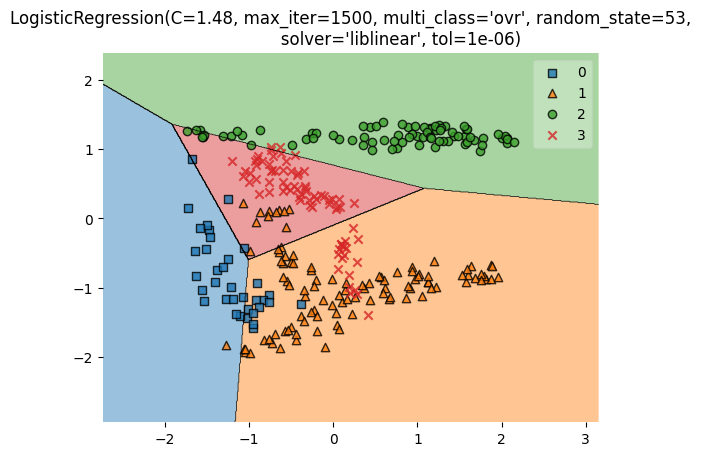

In [41]:
plot_decision_regions(X_test,Y_test,clf=LR6_Q1)
plt.title(str(LR6_Q1))

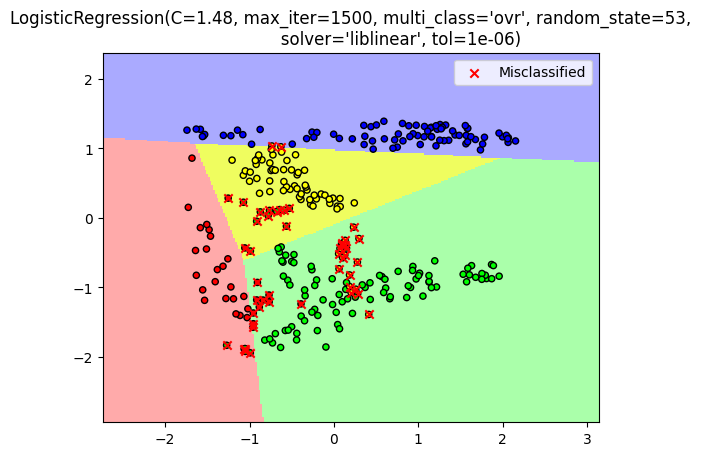

In [48]:
from matplotlib.colors import ListedColormap

# Plot decision boundary with misclassified points
def plot_misclassified_points(X, y, classifier, misclassified_points, title):
    h = .02  # step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF',"#effd5f"])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF',"#FFFF00"])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

    # Plot misclassified points
    plt.scatter(misclassified_points[:, 0], misclassified_points[:, 1], marker='x', color='red', label='Misclassified')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.legend()
    plt.show()

# Plot decision boundary with misclassified points
plot_misclassified_points(X_test, Y_test, SGD6_Q1["log_loss"], X_test[SGD6_Q1["log_loss"].predict(X_test) != Y_test], str(LR6_Q1))


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


Text(0.5, 1.0, "SGDClassifier(alpha=1e-06, early_stopping=True, eta0=34.21084,\n              learning_rate='adaptive', loss='log_loss', max_iter=4000,\n              n_iter_no_change=10, random_state=53, tol=1e-06,\n              validation_fraction=0.15)")

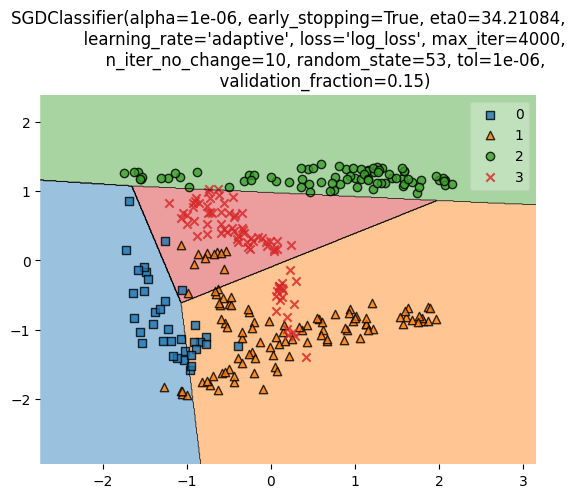

In [49]:
plot_decision_regions(X_test,Y_test,clf=SGD6_Q1["log_loss"])
plt.title(str(SGD6_Q1["log_loss"]))

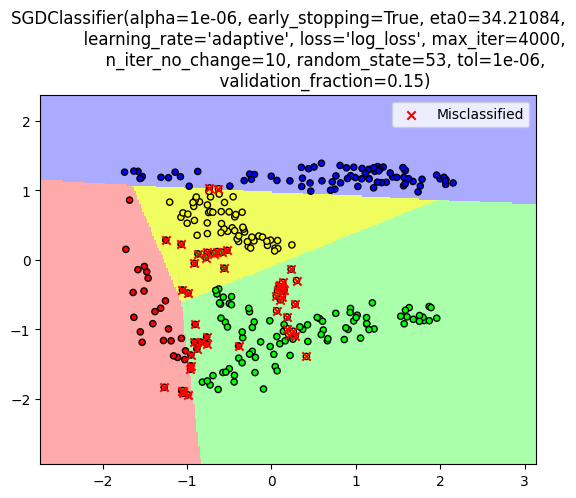

In [50]:
plot_misclassified_points(X_test, Y_test, SGD6_Q1["log_loss"], X_test[SGD6_Q1["log_loss"].predict(X_test) != Y_test], str(SGD6_Q1["log_loss"]))
